In [74]:
#Wczytanie punktów z pliku
points = []
points1 = []
points2 = []
with open('k1.txt', 'r') as file:
    for line in file:
        # Usunięcie zbędnych białych znaków i podział linii na liczby
        values = line.strip().split()
        
        # Konwersja stringów na liczby zmiennoprzecinkowe
        x = float(values[0].replace(',', '.'))
        y = float(values[1].replace(',', '.'))
        z = float(values[2].replace(',', '.'))
        
        # Dodanie punktu do listy
        points.append((x, y, z))
with open('k2.txt', 'r') as file:
    for line in file:
        # Usunięcie zbędnych białych znaków i podział linii na liczby
        values = line.strip().split()
        
        # Konwersja stringów na liczby zmiennoprzecinkowe
        x = float(values[0].replace(',', '.'))
        y = float(values[1].replace(',', '.'))
        z = float(values[2].replace(',', '.'))
        
        # Dodanie punktu do listy
        points1.append((x, y, z))
with open('k3.txt', 'r') as file:
    for line in file:
        # Usunięcie zbędnych białych znaków i podział linii na liczby
        values = line.strip().split()
        
        # Konwersja stringów na liczby zmiennoprzecinkowe
        x = float(values[0].replace(',', '.'))
        y = float(values[1].replace(',', '.'))
        z = float(values[2].replace(',', '.'))        
        # Dodanie punktu do listy
        points2.append((x, y, z))

#for point in points:
   #print(point)

(3, 207)


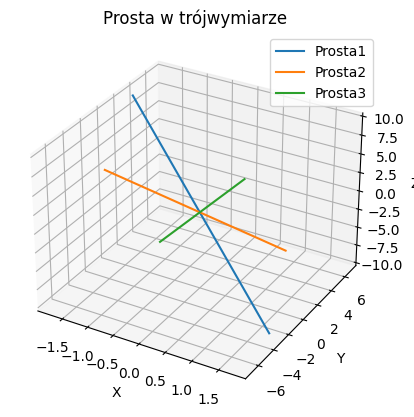

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
points = np.array(points).T
points1 = np.array(points1).T
points2 = np.array(points2).T
n = points.shape[1]
nu = points1.shape[1]
nub = points2.shape[1]
center = np.mean(points, axis=1)
A = np.vstack([points[0], points[1], np.ones(n)]).T
plane_params = np.linalg.lstsq(A, points[2], rcond=None)[0]
xx, yy = np.meshgrid(np.linspace(-4, 4, 10), np.linspace(-4, 4, 10))
zz = plane_params[0]*xx + plane_params[1]*yy + plane_params[2]
z_center = plane_params[0]*center[0] + plane_params[1]*center[1] + plane_params[2]
normal_vector = np.array([plane_params[0], plane_params[1], -1])
z_pr1 = np.linspace(-10, 10, 100)
x_pr1 = (-normal_vector[1] * z_pr1) / normal_vector[0]
y_pr1 = (-normal_vector[2] * z_pr1) / normal_vector[0]

#tutaj dla drugiego kółka
center = np.mean(points1, axis=1)
A = np.vstack([points1[0], points1[1], np.ones(nu)]).T
plane_params = np.linalg.lstsq(A, points1[2], rcond=None)[0]
xx, yy = np.meshgrid(np.linspace(-4, 4, 10), np.linspace(-4, 4, 10))
zz = plane_params[0]*xx + plane_params[1]*yy + plane_params[2]
z_center = plane_params[0]*center[0] + plane_params[1]*center[1] + plane_params[2]
normal_vector = np.array([plane_params[0], plane_params[1], -1])


z_pr2 = np.linspace(-10, 10, 100)
x_pr2 = (-normal_vector[1] * z_pr2) / normal_vector[0]
y_pr2 = (-normal_vector[2] * z_pr2) / normal_vector[0]

center = np.mean(points2, axis=1)
A = np.vstack([points2[0], points2[1], np.ones(nub)]).T
plane_params = np.linalg.lstsq(A, points2[2], rcond=None)[0]
xx, yy = np.meshgrid(np.linspace(-4, 4, 10), np.linspace(-4, 4, 10))
zz = plane_params[0]*xx + plane_params[1]*yy + plane_params[2]
z_center = plane_params[0]*center[0] + plane_params[1]*center[1] + plane_params[2]
normal_vector = np.array([plane_params[0], plane_params[1], -1])


z_pr3 = np.linspace(-10, 10, 100)
x_pr3 = (-normal_vector[1] * z_pr3) / normal_vector[0]
y_pr3 = (-normal_vector[2] * z_pr3) / normal_vector[0]



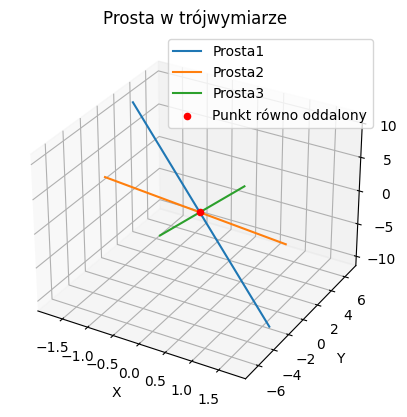

In [108]:
from scipy.optimize import minimize

def line1(t):
    x = x_pr1
    y = y_pr1
    z = z_pr1
    return x, y, z

def line2(t):
    x = x_pr2
    y =  y_pr2 
    z = z_pr2
    return x, y, z

def line3(t):
    x = x_pr3
    y = y_pr3
    z = z_pr3
    return x, y, z

# Funkcja obliczająca odległość punktu od prostych
def distance_from_lines(point, line1, line2, line3):
    x, y, z = point

    distance1 = np.sqrt((x - line1[0])**2 + (y - line1[1])**2 + (z - line1[2])**2)
    distance2 = np.sqrt((x - line2[0])**2 + (y - line2[1])**2 + (z - line2[2])**2)
    distance3 = np.sqrt((x - line3[0])**2 + (y - line3[1])**2 + (z - line3[2])**2)

    return distance1, distance2, distance3

# Pomocnicza funkcja celu obliczająca sumę wartości bezwzględnych
def objective_function(point):
    distances = distance_from_lines(point, line1(1), line2(1), line3(1))
    return np.sum(np.abs(distances[0] - distances[1]) + np.abs(distances[0] - distances[2]) + np.abs(distances[1] - distances[2]))

# Początkowe przybliżenie punktu
initial_point = [0, 0, 0]

# Obliczenie punktu równo oddalonego od prostych
result = minimize(objective_function, initial_point)

# Odczytanie znalezionego punktu
equidistant_point = result.x

# Wykres 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Wyświetlanie prostej
ax.plot(x_pr1, y_pr1, z_pr1, label='Prosta1')
ax.plot(x_pr2, y_pr2, z_pr2, label='Prosta2')
ax.plot(x_pr3, y_pr3, z_pr3, label='Prosta3')
ax.scatter(*equidistant_point, color='red', label='Punkt równo oddalony')

# Dodanie etykiet i tytułu
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Prosta w trójwymiarze')

# Dodanie legendy
ax.legend()

# Wyświetlenie wykresu
plt.show()
